In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import data_engineering_library as dlib

In [7]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframe_London_UTD19 = dlib.load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_UTD19.csv", nrows=1000000)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [8]:
dataframe_London_UTD19_raw = dataframe_London_UTD19.copy()

In [9]:
# Count occurrences of 0 and 1 in a specific column
counts = dataframe_London_UTD19['error'].value_counts().reindex([0, 1], fill_value=0)
print(counts)

error
0    663870
1    336130
Name: count, dtype: int64


In [10]:
speed = dataframe_London_UTD19['speed'].unique()
speed

array([nan])

In [11]:
# Drop the error column, because it is not needed
dataframe_London_UTD19, errors = dlib.preprocess_dataframe(dataframe_London_UTD19)
print(errors)
dataframe_London_UTD19.head()

336130


,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [12]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

3675

In [13]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='flow')


Total outliers detected and removed: 0


In [14]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='occ')

Total outliers detected and removed: 0


In [15]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='flow', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 16


,day,interval,detid,flow,occ,city,weekday
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday


In [16]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='occ', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 10


,day,interval,detid,flow,occ,city,weekday
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday


In [17]:
#Calculate the speed using the formula speed = flow / occupancy
dataframe_London_UTD19 = dlib.calculate_traffic_speed(dataframe_London_UTD19)
dataframe_London_UTD19_raw = dlib.calculate_traffic_speed(dataframe_London_UTD19_raw)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [18]:
dataframe_London_UTD19 = dlib.drop_outliers(dataframe_London_UTD19, column='traffic', group_by_detid=True)
dataframe_London_UTD19.head()

Total outliers dropped: 7596


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [19]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='traffic')
dataframe_London_UTD19.head()

Total outliers detected and removed: 0


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [20]:
dataframe_London_UTD19 = dlib.drop_false_values(dataframe_London_UTD19, column='traffic', outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers detected and removed: 46065


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [21]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

139


In [22]:
anomlies_df = dlib.detect_anomalies(dataframe_London_UTD19, column='traffic', min_IQR=5, min_range=20, min_data_points=5000)

Anomalies detected based on IQR: 2
Anomalies detected based on IQR or range conditions: 2
Anomalies detected based on not enough data: 102


In [19]:
len(anomlies_df)

104

In [20]:
dataframe_London_UTD19, anomlies_df = dlib.handle_anomalies(dataframe_London_UTD19, anomlies_df)

Anomalies with not enough data handled: 19
Total amount of dropeed anomalies: 85


In [21]:
handeled_anomalies_df = dlib.handle_detectors_with_bad_days(dataframe_London_UTD19, anomlies_df)
handeled_anomalies_df = handeled_anomalies_df[
    handeled_anomalies_df[['mean_out_of_bound', 'IQR_to_small', 'not_enough_data']].any(axis=1)
]
len(handeled_anomalies_df)

Anomalies with not enough data handled: 0


85

In [22]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

0

In [23]:
anomalies = handeled_anomalies_df['detid'].unique()
dataframe_London_UTD19 = dataframe_London_UTD19[~dataframe_London_UTD19['detid'].isin(anomalies)]

In [24]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

54


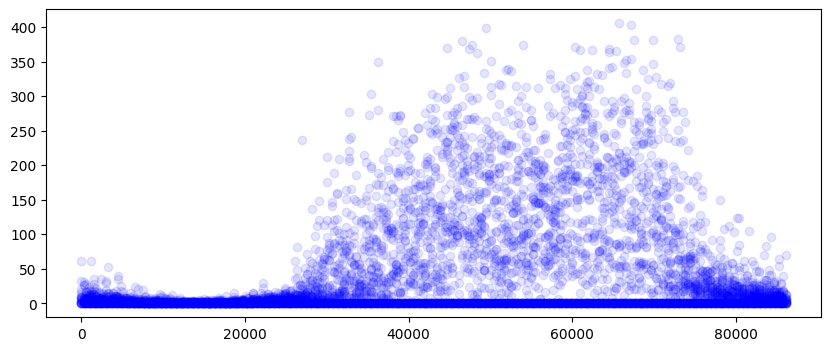

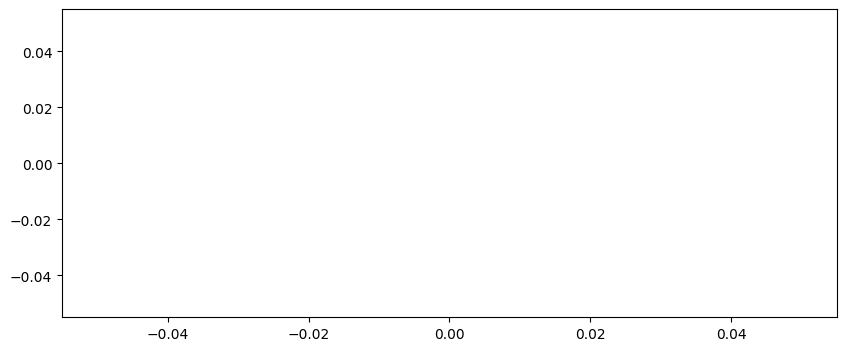

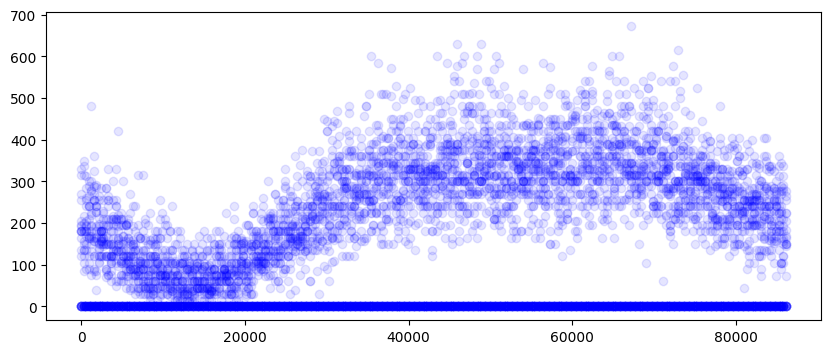

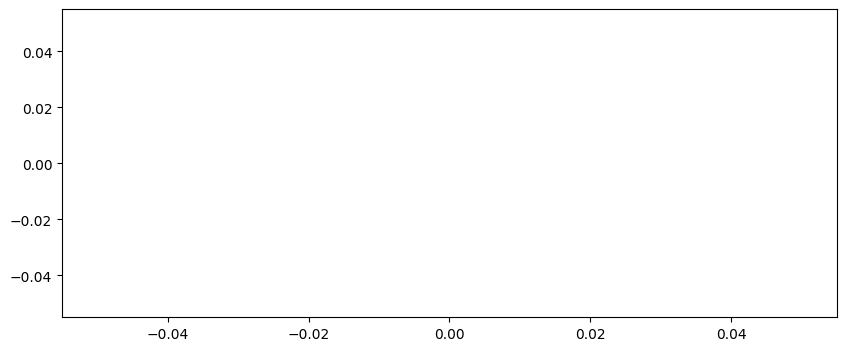

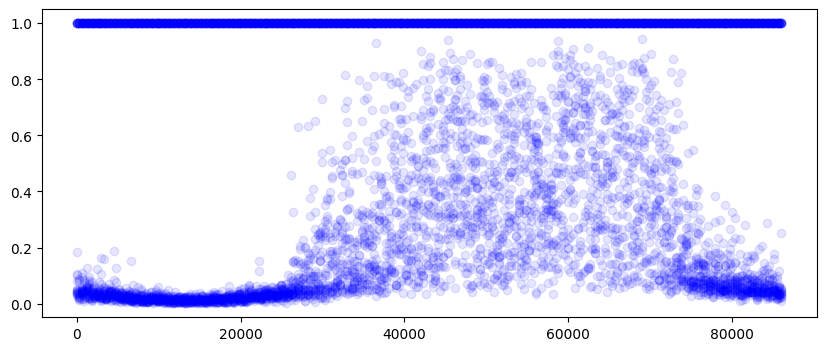

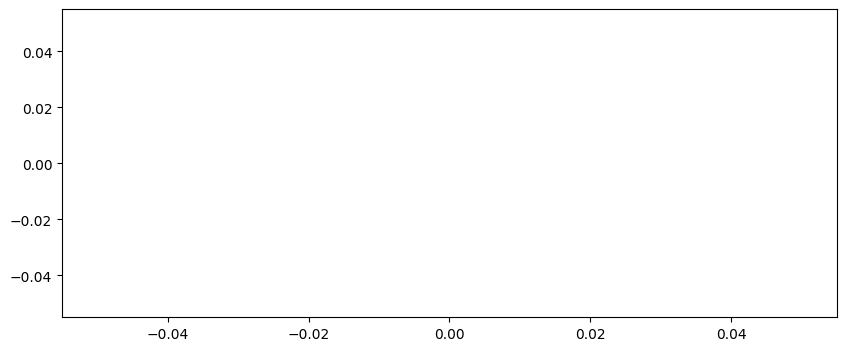

In [25]:
#Plot the speed, traffic and occ of a random detector
dataframe_detector = dataframe_London_UTD19_raw[dataframe_London_UTD19_raw['detid'] == 'EAST_N17/121b1']
dataframe_detector_clean = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1']
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['traffic'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['flow'], alpha=0.1, color='blue')                                  
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['flow'], alpha=0.1, color='red')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['occ'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['occ'], alpha=0.1, color='red')
plt.show()

In [26]:
# select a random detector
unique_detectors = dataframe_London_UTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N01/009g1


,day,interval,detid,flow,occ,city,weekday,traffic
18345,2015-05-15,0,CNTR_N01/009g1,708.0,0.320000,london,Friday,226.560014
18346,2015-05-15,300,CNTR_N01/009g1,492.0,0.390833,london,Friday,192.290003
18347,2015-05-15,600,CNTR_N01/009g1,708.0,0.371667,london,Friday,263.140009
18348,2015-05-15,900,CNTR_N01/009g1,576.0,0.397500,london,Friday,228.960000
18349,2015-05-15,1200,CNTR_N01/009g1,576.0,0.500000,london,Friday,288.000000


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1
- CNTR_N01/009u1
- CNTR_N01/105b2

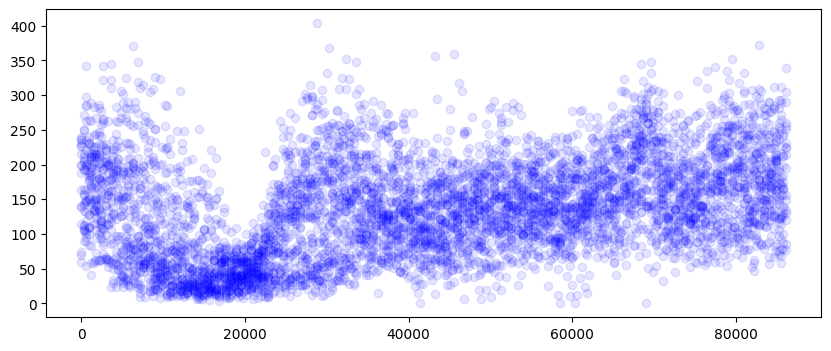

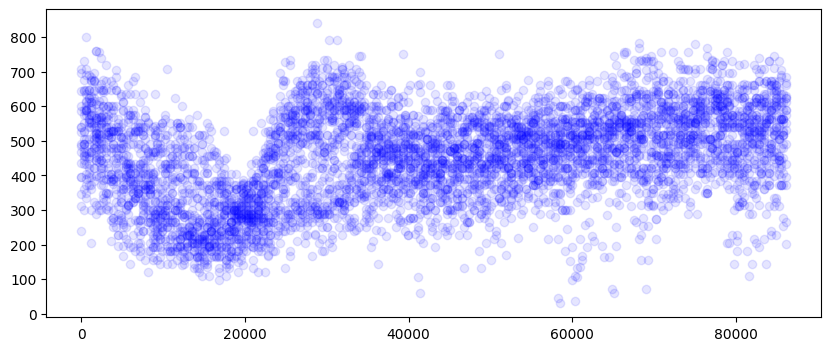

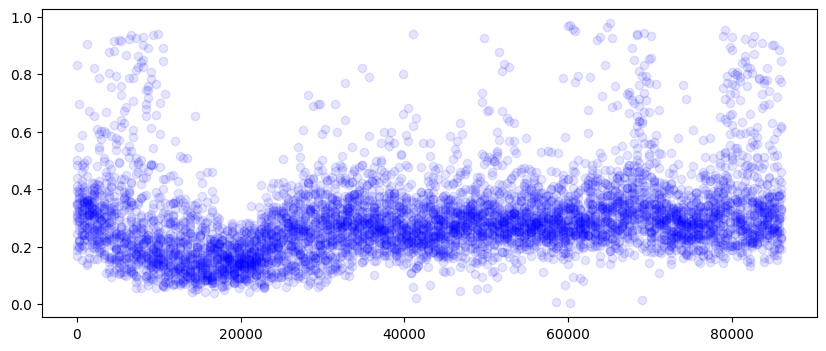

In [27]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [28]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Saturday


,day,interval,detid,flow,occ,city,weekday,traffic
18598,2015-05-16,0,CNTR_N01/009g1,240.0,0.831667,london,Saturday,199.599998
18599,2015-05-16,300,CNTR_N01/009g1,360.0,0.695000,london,Saturday,250.200000
18600,2015-05-16,600,CNTR_N01/009g1,336.0,0.589167,london,Saturday,197.959984
18601,2015-05-16,900,CNTR_N01/009g1,432.0,0.406667,london,Saturday,175.680006
18602,2015-05-16,1200,CNTR_N01/009g1,204.0,0.904167,london,Saturday,184.449995


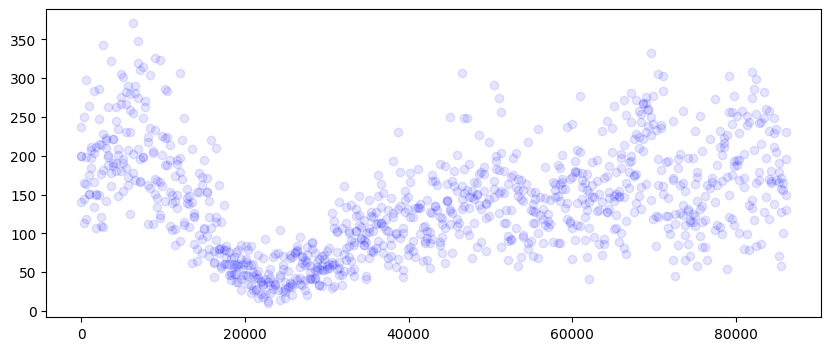

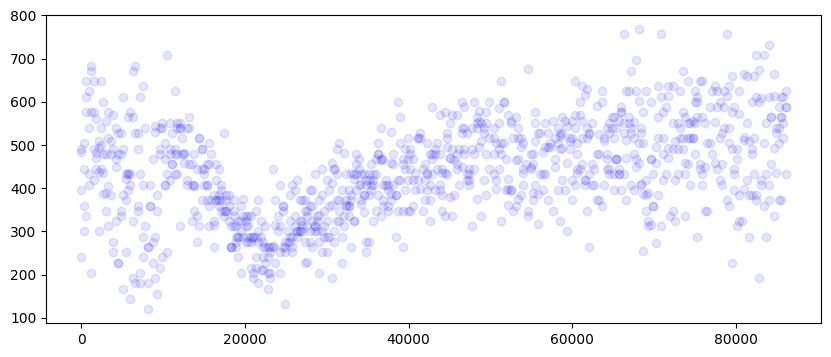

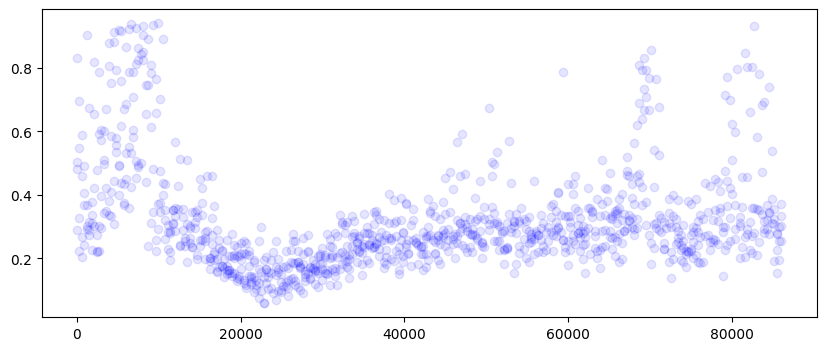

In [29]:
#Plot the speed, traffic an occ of a random detector on a random day
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()

In [30]:
dataframe_London_UTD19_mean = dataframe_London_UTD19.copy()
dataframe_London_UTD19_mean['interval'] = (dataframe_London_UTD19_mean['interval'] / 1500).round() * 1000
dataframe_London_UTD19_mean.head(20)

,day,interval,detid,flow,occ,city,weekday,traffic
6435,2015-05-15,0.0,CNTR_N01/007a1,348.00000,0.397500,london,Friday,138.330002
6436,2015-05-15,0.0,CNTR_N01/007a1,348.00000,0.355833,london,Friday,123.830004
6437,2015-05-15,0.0,CNTR_N01/007a1,492.00000,0.475000,london,Friday,233.699990
6438,2015-05-15,1000.0,CNTR_N01/007a1,420.00000,0.389167,london,Friday,163.449997
6439,2015-05-15,1000.0,CNTR_N01/007a1,348.00000,0.496667,london,Friday,172.839998
6440,2015-05-15,1000.0,CNTR_N01/007a1,456.00000,0.495000,london,Friday,225.720009
6441,2015-05-15,1000.0,CNTR_N01/007a1,459.45764,0.269251,london,Friday,123.709621
6442,2015-05-15,1000.0,CNTR_N01/007a1,373.01694,0.321186,london,Friday,119.807988
6443,2015-05-15,2000.0,CNTR_N01/007a1,422.89656,0.368305,london,Friday,155.754748
6444,2015-05-15,2000.0,CNTR_N01/007a1,408.00000,0.230833,london,Friday,94.179995


In [31]:
grouped_mean = dataframe_London_UTD19_mean.groupby(['interval', 'day', 'detid', 'weekday']).mean('traffic').reset_index()
grouped_mean.head()


,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N01/007a1,Friday,396.0,0.409444,165.286666
1,0.0,2015-05-15,CNTR_N01/007c1,Friday,436.0,0.402778,178.349999
2,0.0,2015-05-15,CNTR_N01/007z1,Friday,740.0,0.281667,208.236657
3,0.0,2015-05-15,CNTR_N01/009g1,Friday,636.0,0.360833,227.330009
4,0.0,2015-05-15,CNTR_N01/009h1,Friday,306.0,0.142083,41.840003


In [35]:
grouped_mean = dataframe_London_UTD19.copy()
grouped_mean = dlib.combine_datapoints(grouped_mean, ratio=3600)
grouped_mean.head()

,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N01/007a1,Friday,410.208234,0.411203,168.797089
1,0.0,2015-05-15,CNTR_N01/007c1,Friday,439.263923,0.417296,186.321718
2,0.0,2015-05-15,CNTR_N01/007z1,Friday,710.498786,0.304964,214.210231
3,0.0,2015-05-15,CNTR_N01/009g1,Friday,645.297823,0.382571,243.937992
4,0.0,2015-05-15,CNTR_N01/009h1,Friday,342.508477,0.130438,43.669105


In [36]:
grouped_mean['interval'].unique()

array([    0.,  3600.,  7200., 10800., 14400., 18000., 21600., 25200.,
       28800., 32400., 36000., 39600., 43200., 46800., 50400., 54000.,
       57600., 61200., 64800., 68400., 72000., 75600., 79200., 82800.,
       86400.])

Selected detector: CNTR_N01/009h1


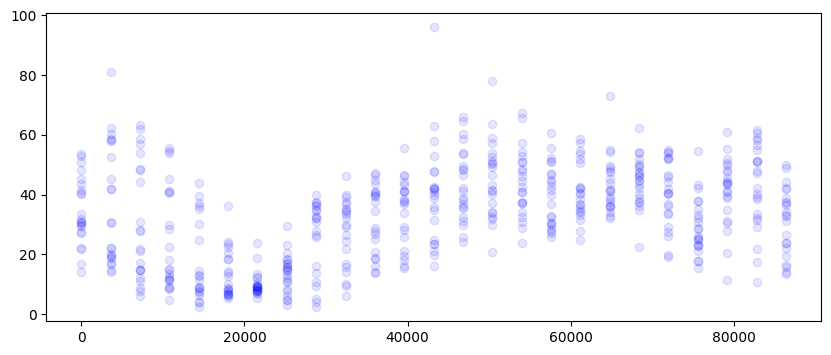

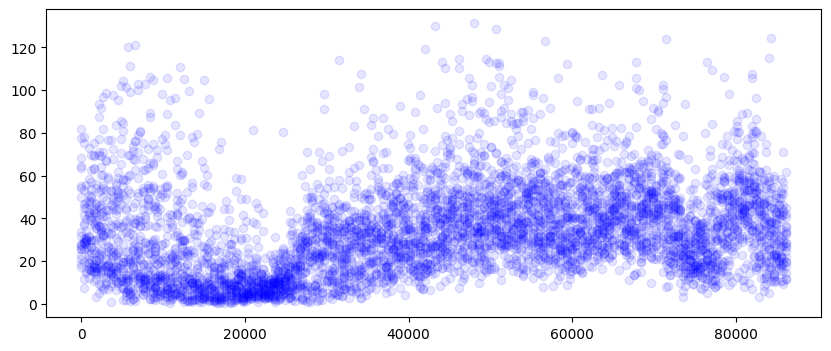

In [44]:
unique_detectors = grouped_mean['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
print(f"Selected detector: {random_detector}")
dataframe_detector = grouped_mean[grouped_mean['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()
dataframe_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()



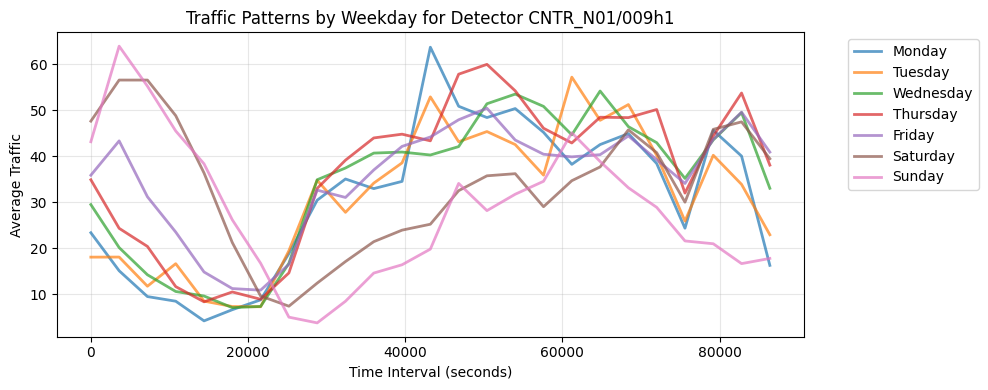

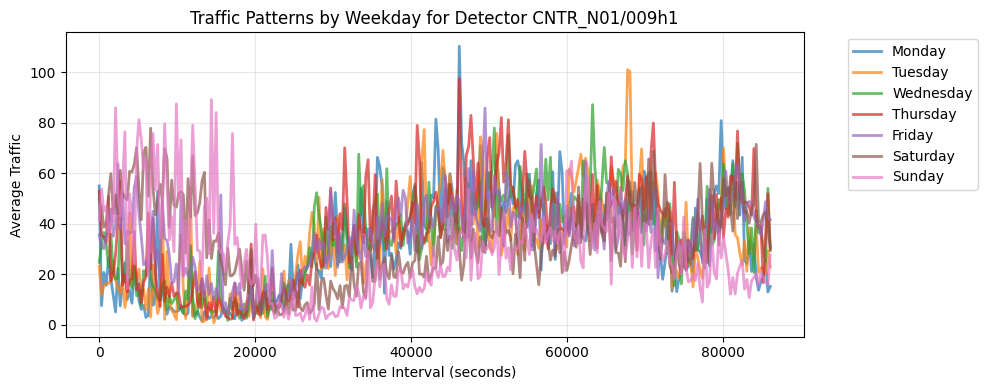

In [45]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 4))

dataframe_detector = grouped_mean[grouped_mean['detid'] == random_detector]

for weekday in weekdays:
    weekday_data = dataframe_detector[dataframe_detector['weekday'] == weekday]
    weekday_mean = weekday_data.groupby('interval')['traffic'].mean()
    plt.plot(weekday_mean.index, weekday_mean.values, label=weekday, linewidth=2, alpha=0.7)

plt.title(f'Traffic Patterns by Weekday for Detector {random_detector}')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Average Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
dataframe_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]

for weekday in weekdays:
    weekday_data = dataframe_detector[dataframe_detector['weekday'] == weekday]
    weekday_mean = weekday_data.groupby('interval')['traffic'].mean()
    plt.plot(weekday_mean.index, weekday_mean.values, label=weekday, linewidth=2, alpha=0.7)

plt.title(f'Traffic Patterns by Weekday for Detector {random_detector}')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Average Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()